In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/Shareddrives/DSF_Project/03 - WVS ESS Reporting'

/content/drive/Shareddrives/DSF_Project/03 - WVS ESS Reporting


# Read and Clean

In [4]:
df_countries = pd.read_csv('wvs-countrymapping.csv')

In [5]:
# reading shall give an error for column 504, 505, 506 
# checked those columns, they do not seem to contribute to the needed questions
# col 504, 505, 506 -> discuss party affiliations of something (mostly the person who responded lol)
df_main = pd.read_csv('wvsdata.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (504,505,506) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# just get the needed columns to reduce the data
sel_cols = []

sel_cols.append('B_COUNTRY')            # country code/ID
sel_cols.append('Q48')                  # Freedom to make choices Q1
sel_cols.append('Q49')                  # Freedom to make choices Q2
sel_cols.append('Q112')                 # Perceptions of Corruption Q1
sel_cols.append('Q113')                 # Perceptions of Corruption Q2 P1
sel_cols.append('Q114')                 # Perceptions of Corruption Q2 P2
sel_cols.append('Q115')                 # Perceptions of Corruption Q2 P3
sel_cols.append('Q116')                 # Perceptions of Corruption Q2 P4
sel_cols.append('Q117')                 # Perceptions of Corruption Q2 P5
sel_cols.append('Q46')                  # Positive Effects
sel_cols.append("Q131")                 #Security
sel_cols.append("Q253")                 #Respect for Human Rights

cor_q2_cols = []
cor_q2_cols.append('Q113')                 # Perceptions of Corruption Q2 P1
cor_q2_cols.append('Q114')                 # Perceptions of Corruption Q2 P2
cor_q2_cols.append('Q115')                 # Perceptions of Corruption Q2 P3
cor_q2_cols.append('Q116')                 # Perceptions of Corruption Q2 P4
cor_q2_cols.append('Q117')                 # Perceptions of Corruption Q2 P5


df_main = df_main[sel_cols]

In [7]:
# replace NaN with zero for now
# mean/medin by country maybe a suitable option
df_main = df_main.fillna(0)

# combine the answers for the 5 parts of corruption
df_main['Q113-Q117'] = df_main.apply(lambda x: sum(x[cor_q2_cols])/float(len(cor_q2_cols)) , axis=1)

# get avaerage of each column except country code OF COURSE

df_main_avg = df_main.groupby('B_COUNTRY').mean().reset_index()

In [8]:
# merge the actual contry names to the dataset
df_main_avg = df_main_avg.merge(df_countries, how='left', left_on='B_COUNTRY', right_on='country_id')
df_main_avg

,B_COUNTRY,Q48,Q49,Q112,Q113,Q114,Q115,Q116,Q117,Q46,Q131,Q253,Q113-Q117,country_id,country
0,20,7.522908,7.522908,5.650398,2.128486,2.237052,2.096614,1.881474,1.872510,1.710159,1.285857,1.771912,2.043227,20,Andorra
1,32,7.703888,7.701894,8.463609,2.543370,2.371884,2.465603,2.625125,2.299103,1.775673,2.421735,2.389831,2.461017,32,Argentina
2,36,7.610039,7.461114,6.576393,2.140099,2.271925,2.130171,1.949255,2.312190,1.774959,1.992830,1.897408,2.160728,36,Australia
3,50,7.265833,7.604167,7.745833,2.448333,1.937500,2.090833,2.766667,1.918333,1.835000,1.850000,1.817500,2.232333,50,Bangladesh
4,68,7.331882,7.441219,8.507015,2.792937,2.417513,2.593614,2.606193,2.028544,1.905660,2.296081,2.494436,2.487760,68,Bolivia
5,76,7.367764,7.528944,9.368899,2.956867,2.333712,2.436436,2.148695,2.021566,1.811010,2.698070,2.526674,2.379455,76,Brazil
6,104,6.717500,7.200000,7.380833,2.145000,2.172500,2.135833,2.210000,2.113333,1.825000,1.620000,2.069167,2.155333,104,Myanmar
7,152,7.418000,7.125000,7.047000,2.883000,2.820000,2.719000,2.626000,2.463000,1.852000,2.594000,2.384000,2.702200,152,Chile
8,156,7.064888,7.387352,6.460474,2.051054,2.273057,2.289855,2.138669,2.017128,1.850132,1.831686,1.795784,2.153953,156,China
9,158,7.339330,7.068684,7.609975,2.331971,2.218316,2.340965,2.135732,2.113655,1.860180,1.563369,2.081766,2.228128,158,Taiwan


# Adding the variables by WHR20

- Social Support
- Freedom to make life choices
- Generosity
- Perceptions of corruption
- Positive affect
- Negative affect


In [9]:
def calc_percep_corrruption(x):
    q1_wt = 0.5
    q2_wt = 1.0 - q1_wt

    q1 = ['Q112']
    q2 = ['Q113','Q114','Q115','Q116','Q117']

    result = 0

    for col in q1:
        result += (q1_wt/len(q1)) * x[col]
    for col in q2:
        result += (q2_wt/len(q2)) * x[col]

    return result/7

final_cols = ['country','Social_Support','Freedom_Choice','Generosity','Percep_Corruption','Pos_Affect', "Security", "HumanRights"]

df_main_avg['Social_Support'] = 0           # Not Available directly
df_main_avg['Freedom_Choice'] = df_main_avg.apply(lambda x: (x['Q48']+x['Q49'])/20, axis=1)
df_main_avg['Generosity'] = 0               # Not Available directly
df_main_avg['Percep_Corruption'] = df_main_avg.apply(lambda x: calc_percep_corrruption(x), axis=1)
df_main_avg['Pos_Affect'] = df_main_avg.apply(lambda x: x['Q46']/4.0, axis=1)
df_main_avg["Security"] = df_main_avg.apply(lambda x: x["Q131"]/4.0, axis = 1)
df_main_avg["HumanRights"] = df_main_avg.apply(lambda x: x["Q253"]/4.0, axis = 1)

In [10]:
df_main_avg[final_cols].to_csv('final_data.csv')

In [11]:
df_main_avg

,B_COUNTRY,Q48,Q49,Q112,Q113,Q114,Q115,Q116,Q117,Q46,Q131,Q253,Q113-Q117,country_id,country,Social_Support,Freedom_Choice,Generosity,Percep_Corruption,Pos_Affect,Security,HumanRights
0,20,7.522908,7.522908,5.650398,2.128486,2.237052,2.096614,1.881474,1.872510,1.710159,1.285857,1.771912,2.043227,20,Andorra,0,0.752291,0,0.549545,0.427540,0.321464,0.442978
1,32,7.703888,7.701894,8.463609,2.543370,2.371884,2.465603,2.625125,2.299103,1.775673,2.421735,2.389831,2.461017,32,Argentina,0,0.770289,0,0.780330,0.443918,0.605434,0.597458
2,36,7.610039,7.461114,6.576393,2.140099,2.271925,2.130171,1.949255,2.312190,1.774959,1.992830,1.897408,2.160728,36,Australia,0,0.753558,0,0.624080,0.443740,0.498207,0.474352
3,50,7.265833,7.604167,7.745833,2.448333,1.937500,2.090833,2.766667,1.918333,1.835000,1.850000,1.817500,2.232333,50,Bangladesh,0,0.743500,0,0.712726,0.458750,0.462500,0.454375
4,68,7.331882,7.441219,8.507015,2.792937,2.417513,2.593614,2.606193,2.028544,1.905660,2.296081,2.494436,2.487760,68,Bolivia,0,0.738655,0,0.785341,0.476415,0.574020,0.623609
5,76,7.367764,7.528944,9.368899,2.956867,2.333712,2.436436,2.148695,2.021566,1.811010,2.698070,2.526674,2.379455,76,Brazil,0,0.744835,0,0.839168,0.452753,0.674518,0.631669
6,104,6.717500,7.200000,7.380833,2.145000,2.172500,2.135833,2.210000,2.113333,1.825000,1.620000,2.069167,2.155333,104,Myanmar,0,0.695875,0,0.681155,0.456250,0.405000,0.517292
7,152,7.418000,7.125000,7.047000,2.883000,2.820000,2.719000,2.626000,2.463000,1.852000,2.594000,2.384000,2.702200,152,Chile,0,0.727150,0,0.696371,0.463000,0.648500,0.596000
8,156,7.064888,7.387352,6.460474,2.051054,2.273057,2.289855,2.138669,2.017128,1.850132,1.831686,1.795784,2.153953,156,China,0,0.722612,0,0.615316,0.462533,0.457922,0.448946
9,158,7.339330,7.068684,7.609975,2.331971,2.218316,2.340965,2.135732,2.113655,1.860180,1.563369,2.081766,2.228128,158,Taiwan,0,0.720401,0,0.702722,0.465045,0.390842,0.520442


# Comparing with the WHR20 data

In [12]:
df_WHR = pd.read_csv('WHR20_Data_ForWVS.csv')

In [13]:
df_compare = df_main_avg.merge(df_WHR, how='inner', left_on='country', right_on='Country name')

In [14]:
df_compare.columns

Index(['B_COUNTRY', 'Q48', 'Q49', 'Q112', 'Q113', 'Q114', 'Q115', 'Q116',
       'Q117', 'Q46', 'Q131', 'Q253', 'Q113-Q117', 'country_id', 'country',
       'Social_Support', 'Freedom_Choice', 'Generosity_x', 'Percep_Corruption',
       'Pos_Affect', 'Security', 'HumanRights', 'Country name',
       'Regional indicator', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity_y',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [15]:
df_compare[:5]

,B_COUNTRY,Q48,Q49,Q112,Q113,Q114,Q115,Q116,Q117,Q46,Q131,Q253,Q113-Q117,country_id,country,Social_Support,Freedom_Choice,Generosity_x,Percep_Corruption,Pos_Affect,Security,HumanRights,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity_y,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,32,7.703888,7.701894,8.463609,2.543370,2.371884,2.465603,2.625125,2.299103,1.775673,2.421735,2.389831,2.461017,32,Argentina,0,0.770289,0,0.780330,0.443918,0.605434,0.597458,Argentina,Latin America and Caribbean,5.9747,0.053442,6.079446,5.869954,9.810955,0.900568,68.803802,0.831132,-0.194914,0.842010,1.972317,1.028466,1.372544,0.849774,0.520840,0.070100,0.060415,2.072541
1,36,7.610039,7.461114,6.576393,2.140099,2.271925,2.130171,1.949255,2.312190,1.774959,1.992830,1.897408,2.160728,36,Australia,0,0.753558,0,0.624080,0.443740,0.498207,0.474352,Australia,North America and ANZ,7.2228,0.041841,7.304808,7.140791,10.720596,0.944855,73.604538,0.915432,0.190460,0.415169,1.972317,1.310396,1.477146,1.022608,0.621877,0.324974,0.335996,2.129804
2,50,7.265833,7.604167,7.745833,2.448333,1.937500,2.090833,2.766667,1.918333,1.835000,1.850000,1.817500,2.232333,50,Bangladesh,0,0.743500,0,0.712726,0.458750,0.462500,0.454375,Bangladesh,South Asia,4.8328,0.040124,4.911443,4.754157,8.287064,0.687293,64.503067,0.900625,-0.033665,0.661844,1.972317,0.556156,0.868801,0.694941,0.604131,0.176745,0.176736,1.755262
3,68,7.331882,7.441219,8.507015,2.792937,2.417513,2.593614,2.606193,2.028544,1.905660,2.296081,2.494436,2.487760,68,Bolivia,0,0.738655,0,0.785341,0.476415,0.574020,0.623609,Bolivia,Latin America and Caribbean,5.7475,0.050645,5.846765,5.648235,8.851115,0.803109,63.600471,0.875873,-0.091681,0.822606,1.972317,0.730976,1.142351,0.662446,0.574465,0.138375,0.072943,2.425929
4,76,7.367764,7.528944,9.368899,2.956867,2.333712,2.436436,2.148695,2.021566,1.811010,2.698070,2.526674,2.379455,76,Brazil,0,0.744835,0,0.839168,0.452753,0.674518,0.631669,Brazil,Latin America and Caribbean,6.3756,0.040791,6.455550,6.295650,9.566435,0.896724,66.480164,0.799805,-0.101812,0.770601,1.972317,0.952680,1.363464,0.766119,0.483293,0.131675,0.106519,2.571860


In [16]:
df_compare.columns

Index(['B_COUNTRY', 'Q48', 'Q49', 'Q112', 'Q113', 'Q114', 'Q115', 'Q116',
       'Q117', 'Q46', 'Q131', 'Q253', 'Q113-Q117', 'country_id', 'country',
       'Social_Support', 'Freedom_Choice', 'Generosity_x', 'Percep_Corruption',
       'Pos_Affect', 'Security', 'HumanRights', 'Country name',
       'Regional indicator', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity_y',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [17]:
from sklearn import preprocessing

common_cols = []
score_cols_WVS = ['Freedom_Choice', 'Percep_Corruption','Pos_Affect', 'Security', 'HumanRights']
# score_cols_WHR = ['Ladder score']
score_cols_WHR = ['Freedom to make life choices','Perceptions of corruption','Social support', 'Generosity_y']

df_final = df_compare[common_cols + score_cols_WHR + score_cols_WVS]

if len(score_cols_WVS)>1:
    df_compare[score_cols_WVS] = pd.DataFrame( preprocessing.normalize(df_compare[score_cols_WVS]))
if len(score_cols_WHR)>1:
    df_compare[score_cols_WHR] = pd.DataFrame( preprocessing.normalize(df_compare[score_cols_WHR]))

df_compare['WVS_score'] = df_compare.apply(lambda x: sum([x[col] for col in score_cols_WVS]), axis=1)
df_compare['WHR_score'] = df_compare.apply(lambda x: sum([x[col] for col in score_cols_WHR]), axis=1)

df_compare['WVS_rank'] = df_compare['WVS_score'].rank(method='max')
df_compare['WHR_rank'] = df_compare['WHR_score'].rank(method='max')

In [18]:
import matplotlib.pyplot as plt

def defCompareAnalysis_WVS(df_baseline):

    main_score_rank = 'WHR_rank'
    scoring_rank = 'WVS_rank'

    fig, axs = plt.subplots(1, 3, figsize=(22,5))

    rank_range = [1,df_baseline.shape[0]]
    axs[0].scatter(df_baseline[main_score_rank],df_baseline[scoring_rank])
    axs[0].plot(rank_range, rank_range, 'k-', lw=2)
    axs[0].set_xlabel(main_score_rank)
    axs[0].set_ylabel(scoring_rank)
    axs[0].set_title('---- Change in the Ranks ----')

    axs[1].hist(df_baseline.apply(lambda x: abs(x[scoring_rank] - x[main_score_rank]), axis=1))
    axs[1].set_title('---- Absolute Change in Rank - Histogram ----')

    axs[2].hist(df_baseline.apply(lambda x: x[scoring_rank] - x[main_score_rank], axis=1))
    axs[2].set_title('---- Change in Rank - Histogram ----')

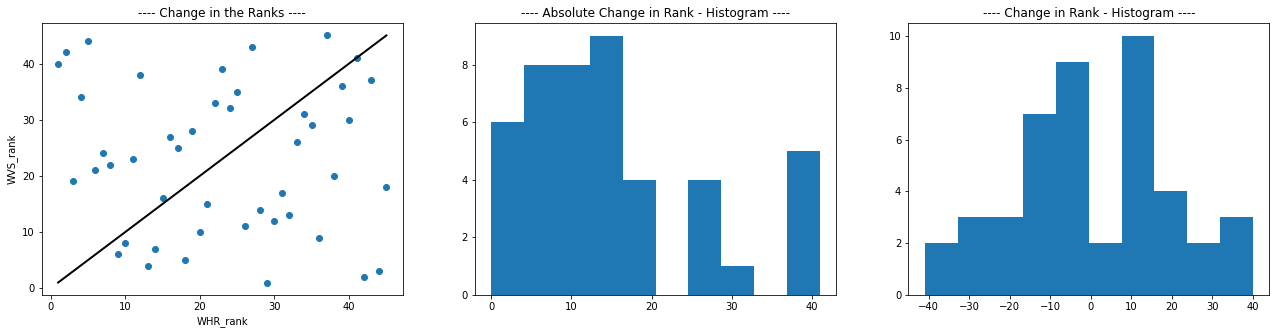

In [19]:
defCompareAnalysis_WVS(df_compare)

In [26]:
print('Median change in ranks: ',df_compare.apply(lambda x: abs(x['WVS_rank'] - x['WHR_rank']), axis=1).median())
print('Mean change in ranks: ',df_compare.apply(lambda x: abs(x['WVS_rank'] - x['WHR_rank']), axis=1).mean())

Median change in ranks:  13.0
Mean change in ranks:  15.377777777777778
